# MLSum - Translation

Traduzione del dataset 
- lingue: spagnolo -> italiano



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/MLSumTrain(es).csv" "/content/drive/MyDrive/"

In [ ]:
!cp "/content/drive/MyDrive/MLSumTrain(es).csv" "/content/MLSumTrain.csv"

In [ ]:
!nvidia-smi

Wed Sep 15 19:31:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Traduzione tramite pipeline

**Da qui:**


In [ ]:
def traduci(data):
    i = 0
    total = data.shape[0]
    translated_data = pd.DataFrame(columns=["source", "target"])

    for index, row in data.iterrows():
      sr = translator(row["source"], max_length = 512, truncation=True)
      source = sr[0]['translation_text']
      tg = translator(row["target"], max_length = 512, truncation=True)
      target = tg[0]['translation_text']
      translated_data.at[i, "source"] = source
      translated_data.at[i, "target"] = target
      i = i+1
      print("Tradotti " + str(format(i/total*100, ".1f")) + "%")
      if i%20 == 0:
        print("\nDOCUMENTO:\n" + source, "\n\nRIASSUNTO:\n" + target + "\n")

    return translated_data

In [ ]:
df = pd.read_csv("/content/xat.csv")

# Googletrans

Non funziona per limiti sull'utilizzo, solo poche traduzioni possibili

In [ ]:
!pip install -q googletrans==4.0.0-rc1

In [ ]:
df = df.to_json()

In [ ]:
from googletrans import Translator
import time

In [ ]:
def traduci(data):

    translated_data = pd.DataFrame(columns=["source", "target"])
    i = 0
    total = data.shape[0]

    for index, row in data.iterrows():
        source = translator.translate(row["source"], src = "en", dest="it").text
        target = translator.translate(row["target"], src = "en", dest="it").text
        if translator.detect(source).lang == "it" and translator.detect(target).lang == "it":
          translated_data.at[i, "source"] = source
          translated_data.at[i, "target"] = target
          i = i+1
          print("Translated " + str(i/total*100)+"%")
          if i%5 == 0: time.sleep(1)

    return translated_data

In [ ]:
chunksize = 100
tradotti = 0 
for chunk in pd.read_csv("/content/XSum.csv", chunksize=chunksize):
    trans = traduci(chunk)
    tradotti += chunksize
    nome = "XTrad" + str(tradotti) + ".csv"

    with open(nome, "w") as f:
      trans.to_csv(f)

    print("Elementi tradotti: ", tradotti)
    time.sleep(10)


In [ ]:
!pip install sentencepiece -q
!pip install datasets -q

In [ ]:
print(len(dataset["test"]["article"]), len(dataset["train"]["article"]))

11490 287113


In [ ]:
updated_dataset = dataset.map(lambda example: {'sentence1': 'My sentence: ' + example['sentence1']})

# MLSum

In [ ]:
!pip install -q datasets

     |████████████████████████████████| 264 kB 5.3 MB/s 
     |████████████████████████████████| 119 kB 69.2 MB/s 
     |████████████████████████████████| 243 kB 49.3 MB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 


In [ ]:
from datasets import load_dataset

dataset = load_dataset("mlsum", "es")

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(dataset, orient='index')
df = df.transpose()

# prendiamo document e summary
#df = df.test.dropna().apply(pd.Series)
df = df.train.dropna().apply(pd.Series)
# puliamo il testo
df.text = df.text.apply(lambda x: x.replace('\n', ' '))
df.summary = df.summary.apply(lambda x: x.replace('\n', ' '))

In [ ]:
import re
word_bound = re.compile(r'\b')

def num_words(line):
    return len(word_bound.findall(line)) >> 1

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') 
from matplotlib.colors import to_rgba

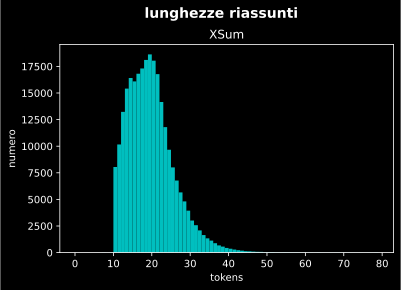

In [ ]:
ii = [i for i in range(0,80)]
lunghezze_riass = [num_words(df.summary.loc[i]) for i in range(df.summary.size-1)]

fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

fig.suptitle('lunghezze riassunti', fontsize=14, fontweight='bold')
ax.set_title('XSum')

ax.set_xlabel('tokens')
ax.set_ylabel('numero')

plt.style.use(['dark_background'])
plt.hist(lunghezze_riass, bins=ii, color='c')

plt.show()

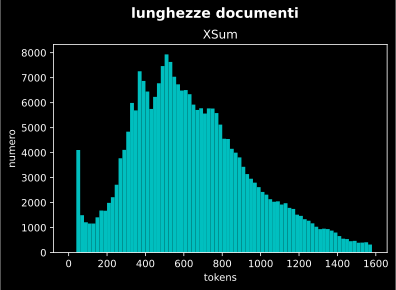

In [ ]:
ii = [i for i in range(0,1600,20)]
lunghezze_docu = [num_words(df['text'].loc[i]) for i in range(df['text'].size-1)]

fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

fig.suptitle('lunghezze documenti', fontsize=14, fontweight='bold')
ax.set_title('XSum')

ax.set_xlabel('tokens')
ax.set_ylabel('numero')

plt.style.use(['dark_background'])
plt.hist(lunghezze_docu, bins=ii, color='c')
plt.show()

In [ ]:
for i in range(df.text.size):
  if num_words(df.text.loc[i]) >= 510 or num_words(df.text.loc[i]) <= 100:
    df = df.drop(df[df.text.index == i].index)
  
print(df.text.size, df.summary.size)

89221 89221


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.head()

text  ...        date
0  Los vuelos han venido registrando este viernes...  ...  01/01/2010
1  El Gobierno turco ha anunciado que emprenderá ...  ...  01/01/2010
2  La policía de Finlandia ha informado este vier...  ...  01/01/2010
3  "Hemos descubierto un agujero vertical en la L...  ...  01/01/2010
4  Gregor Schlierenzauer, último ganador de la Co...  ...  01/01/2010

[5 rows x 6 columns]

In [ ]:
df = df.rename(columns={'text': 'source', 'summary': 'target'})

In [ ]:
df = df.drop(columns=['topic', 'url','title', 'date'])
df.head()

source                                             target
0  Los vuelos han venido registrando este viernes...  El aeropuerto ha estado hasta las 15.00 con só...
1  El Gobierno turco ha anunciado que emprenderá ...  El origen de la leyenda, el san Nicolás histór...
2  La policía de Finlandia ha informado este vier...  El hombre mató a su ex pareja, a cuatro person...
3  "Hemos descubierto un agujero vertical en la L...  El hueco en el subsuelo podría ofrecer refugio...
4  Gregor Schlierenzauer, último ganador de la Co...  El austriaco vence en la tradicional prueba de...

In [ ]:
df.to_csv("/content/MLSumTrain(es).csv", sep=',', index=False)

# Split csv

In [ ]:
# from https://stackoverflow.com/questions/36445193/splitting-one-csv-into-multiple-files

import os

def split(filehandler, delimiter=',', row_limit=2000,
          output_name_template='output_%s.csv', output_path='/content/MLTrain/', keep_headers=True):
    import csv
    reader = csv.reader(filehandler, delimiter=delimiter)
    current_piece = 1
    current_out_path = os.path.join(
        output_path,
        output_name_template % current_piece
    )
    current_out_writer = csv.writer(open(current_out_path, 'w'), delimiter=delimiter)
    current_limit = row_limit
    if keep_headers:
        headers = next(reader)  
        current_out_writer.writerow(headers)
    for i, row in enumerate(reader):
        if i + 1 > current_limit:
            current_piece += 1
            current_limit = row_limit * current_piece
            current_out_path = os.path.join(
                output_path,
                output_name_template % current_piece
            )
            current_out_writer = csv.writer(open(current_out_path, 'w'), delimiter=delimiter)
            if keep_headers:
                current_out_writer.writerow(headers)
        current_out_writer.writerow(row)

In [ ]:
split(open("/content/MLSumTrain.csv", 'r'))

In [ ]:
!cp -r "/content/MLTrain/" "/content/drive/MyDrive/"

# Traduzione

In [ ]:
!pip install -q textacy
!pip install -q sentencepiece
!pip install git+https://github.com/huggingface/transformers -q 

In [ ]:
import pandas as pd

In [ ]:
!cp -r "/content/drive/MyDrive/MLTrain/" "/content/"

In [ ]:
df = pd.read_csv("/content/output_9.csv")

In [ ]:
source = df['source'].tolist()
target = df['target'].tolist()

In [ ]:
print(source[5], target[5])

El ex piloto austríaco Niki Lauda considera que Michael Schumacher, siete veces campeón mundial, será "competitivo" en su regreso a la Fórmula uno con el equipo Mercedes GP, pero no apuesta por el alemán para la lucha por el título. "Todo dependerá del coche. Al final del último campeonato (Sebastian) Vettel tenía el mejor, pero lo que está claro es que ahora hay muchos más pilotos fuertes que en los últimos años de Schumacher. Seguro que va a ser competitivo, pero yo no voy a apostar mi dinero por él", ha asegurado Lauda al diario alemán Bild. Lauda, de 60 años, volvió al Mundial de Fórmula uno en los años 80 después de retirarse y conquistó el último de sus tres títulos. Schumacher cumple 41 años este fin de semana y, aunque el patrón de la Fórmula Uno, el británico Bernie Ecclestone, celebró su regreso, ha apuntado como favorito para ganar el próximo Mundial a otro alemán, Sebastian Vettel. "Por supuesto que Schumacher puede ganar su octavo título, pero hay otros cinco pilotos que p

In [ ]:
'''puliamo i vari esempi'''

import numpy as np
from textacy import preprocessing

# pop all'inizio
print(df.source.size, df.target.size)

df['source'].replace("", np.nan, inplace=True)
df['target'].replace("", np.nan, inplace=True)
df.dropna(subset=['source'], inplace=True)
df.dropna(subset=['target'], inplace=True)

df = df.reset_index(drop=True)
# confrontiamo
print(df.source.size, df.target.size)

clean_inputs = []
clean_targets = []

preproc = preprocessing.make_pipeline(
     preprocessing.normalize.unicode,
     preprocessing.remove.html_tags,
     preprocessing.normalize.whitespace
)

clean_inputs = [preproc(df["source"].iloc[i]) for i in range(df.shape[0])]
clean_targets = [preproc(df["target"].iloc[i]) for i in range(df.shape[0])]

2000 2000
2000 2000


In [ ]:
input_chunks = [clean_inputs[i:i + 50] for i in range(0, len(clean_inputs), 50)]
target_chunks = [clean_targets[i:i + 50] for i in range(0, len(clean_targets), 50)]

In [ ]:
print(len(input_chunks[1]))

10


In [ ]:
!pip install -q transformers transformers[sentencepiece] sentencepiece

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-es-it")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-es-it")
model.eval()
model.to('cuda')

In [ ]:
range(len(input_chunks))

range(0, 40)

In [ ]:
chunk_text = []
chunk_orig = []

for i in range(len(input_chunks)):
  encoded_input = tokenizer(input_chunks[i], return_tensors = "pt", padding = True, truncation = True)
  encoded_input.to('cuda')

  with torch.no_grad():
    output = model.generate(**encoded_input)

  chunk = []
  chunk = tokenizer.batch_decode(output, skip_special_tokens=True)
  for i in range(len(chunk)):
    chunk_text.append(chunk[i])
    chunk_orig.append(input_chunks[i])

In [ ]:
chunk_sum = []
chunk_sum_orig = []

for i in range(len(input_chunks)):
  encoded_input = tokenizer(target_chunks[i], return_tensors = "pt", padding = True, truncation = True)
  encoded_input.to('cuda')

  with torch.no_grad():
    output = model.generate(**encoded_input)

  chunk = []
  chunk = tokenizer.batch_decode(output, skip_special_tokens=True)
  for i in range(len(chunk)):
    chunk_sum.append(chunk[i])
    chunk_sum_orig.append(input_chunks[i])

In [ ]:
len(chunk_text)

20

Processiamo inputs

In [ ]:
out_inputs = translator(clean_inputs, max_length = 512, truncation=True)
out_targets = translator(clean_targets, max_length = 512, truncation=True)

creiamo df

In [ ]:
df = pd.DataFrame({"source": chunk_text, "target": chunk_sum})

In [ ]:
df.to_csv("/content/ML8.csv", sep=',', index=False)